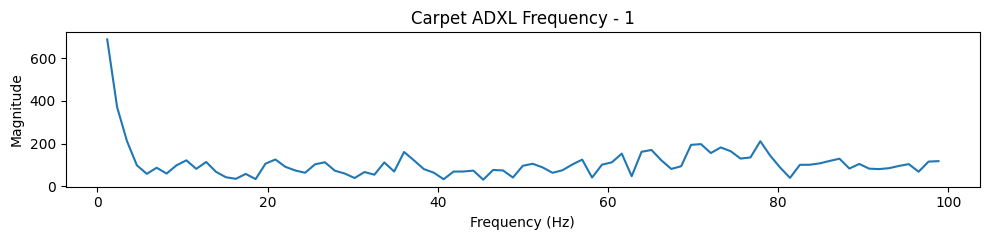

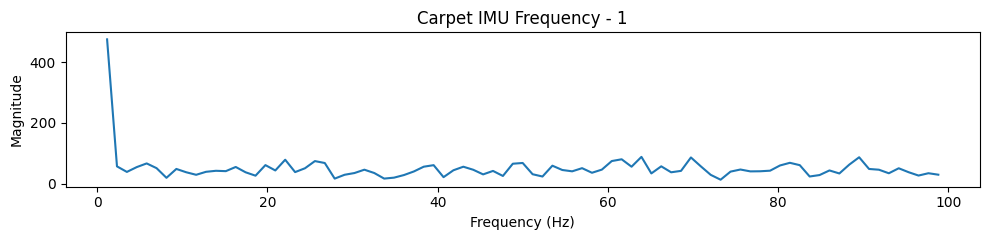

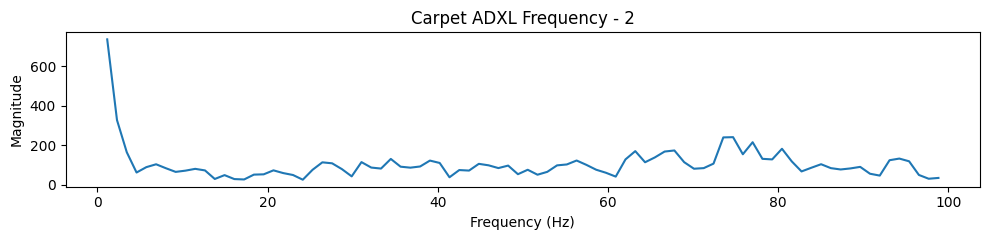

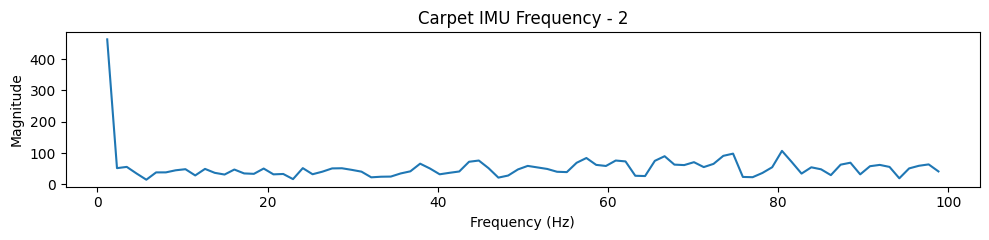

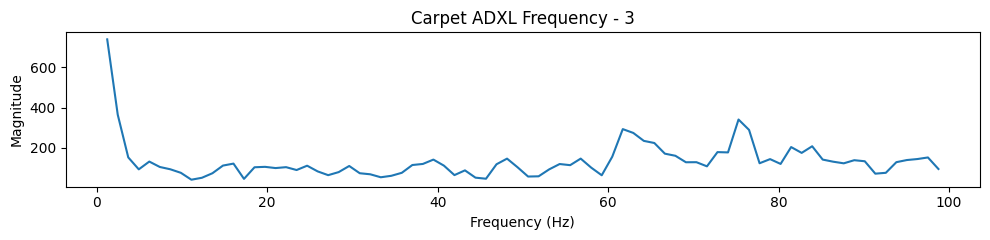

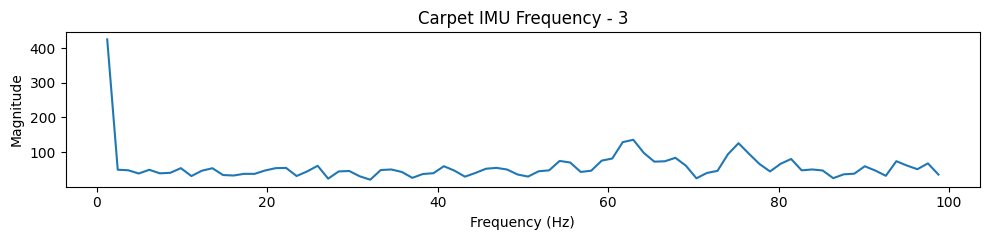

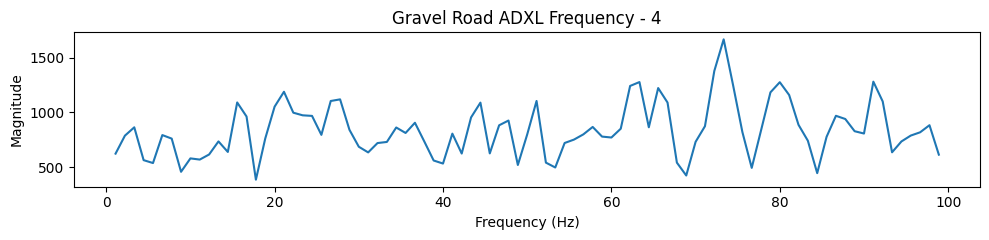

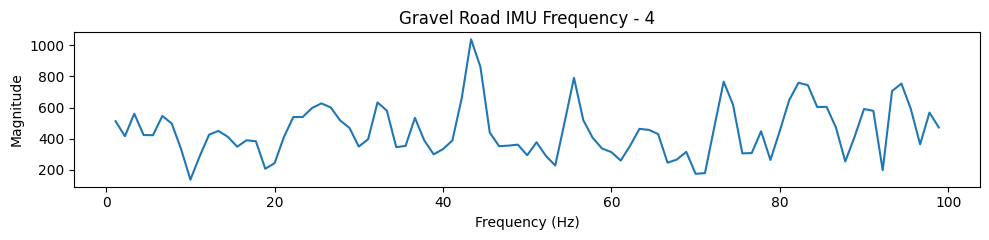

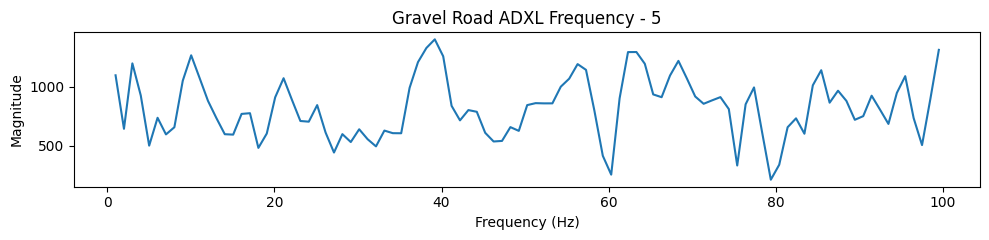

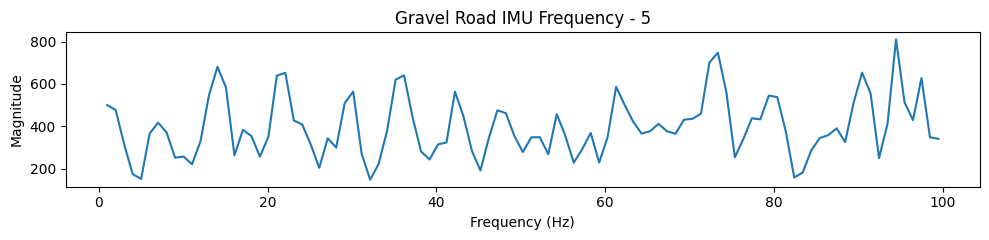

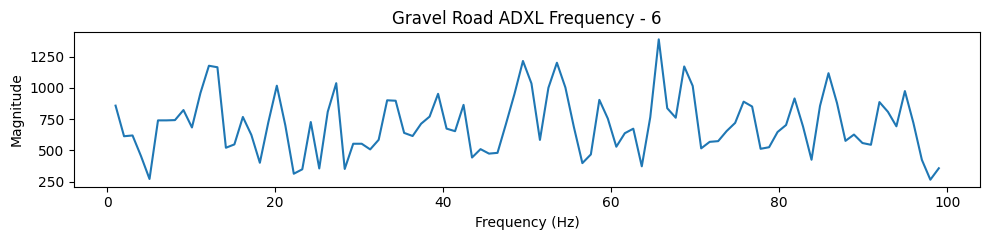

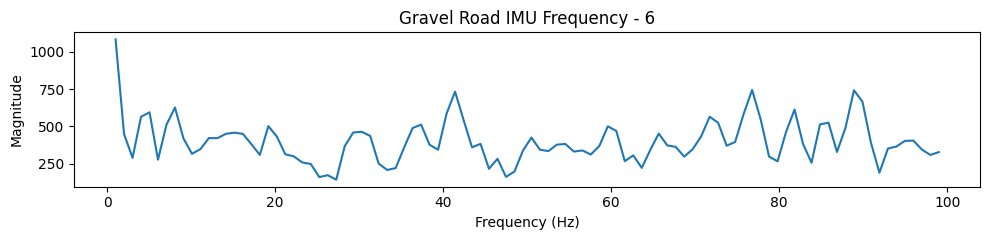

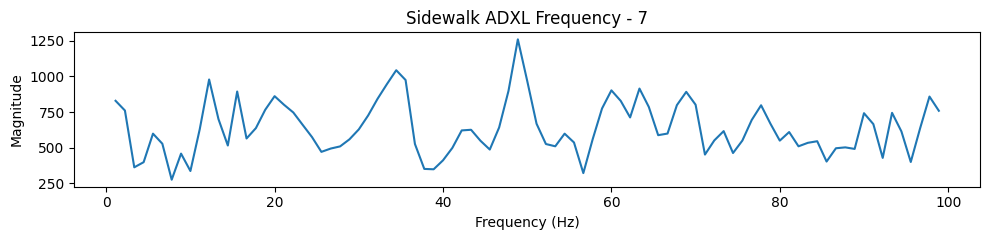

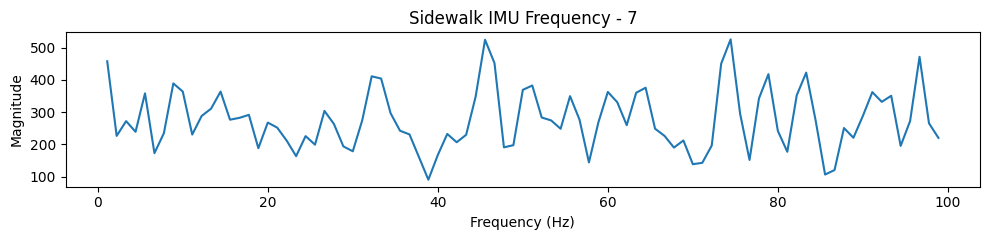

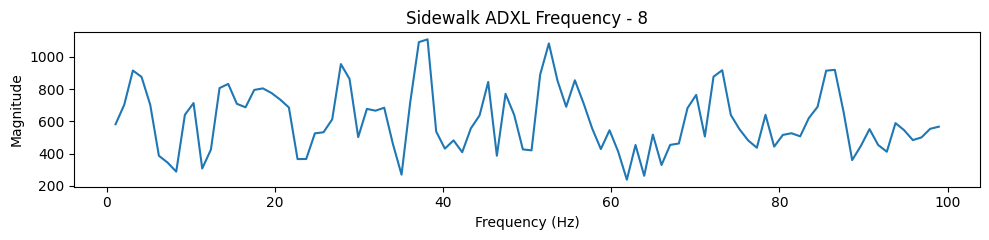

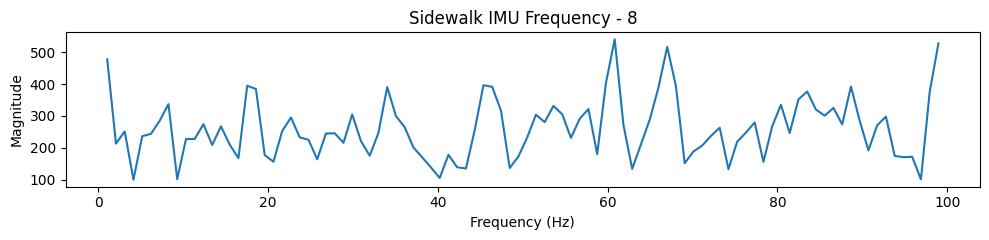

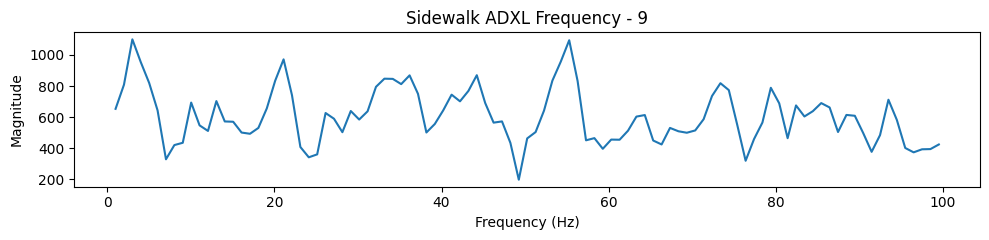

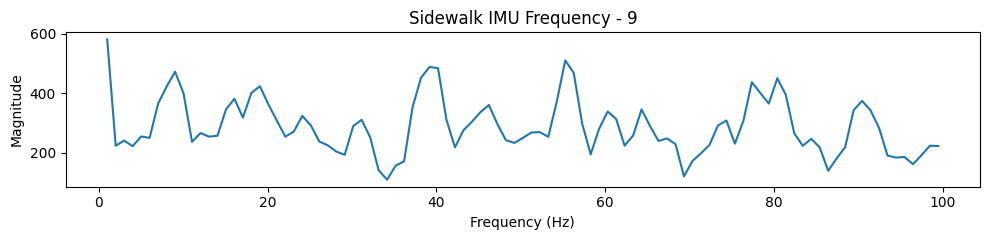

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os as os

# Create a time vector
sampling_rate = 200  # Sampling rate in Hz (200 samples per second)
time = np.arange(num_samples) / sampling_rate

def generateSpectralSignal(accelerometer_magnitude_array,list_item):
    array_cnt = 0
    for magnitude in accelerometer_magnitude_array:
        array_cnt +=1
        #Compute the FFT
        fft_result = np.fft.fft(magnitude)
        #Calculate the frequency values corresponding to the FFT result
        freq = np.fft.fftfreq(len(magnitude), 1.0 / sampling_rate)
        
        fft_result = np.fft.fftshift(fft_result)
        freq = np.fft.fftshift(freq)
        positive_freq_indices = np.where(freq > 0)
        positive_freq = freq[positive_freq_indices]
        positive_fft_result = fft_result[positive_freq_indices]
        
        # Plot the time domain signal
        plt.figure(figsize=(10, 2.5))
        plt.plot(positive_freq, np.abs(positive_fft_result))
        plt.title(trimExcelFileName(list_item)+checkArrayType(array_cnt)+str(chart_cnt))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')

        plt.tight_layout()
        plt.show()

def checkArrayType(array_cnt):
    if array_cnt>1:
        return ' IMU Frequency - '
    else:
        return ' ADXL Frequency - '

def trimExcelFileName(excel_file_name):
    parts = excel_file_name.split("\\")
    return parts[-1].split('_')[0] 

data_folder_path = 'D:/GEM Lab/GEMLabHCIResearch/Accelerometer and Audio data/IMU and ADXL data/Excel data and plotting program/Excel sheets/'
folder_list = os.listdir(data_folder_path)
chart_cnt=1

for list_item in folder_list:
    item_path = os.path.join(data_folder_path, list_item)
    if os.path.isfile(item_path):
        surface_data = pd.read_excel(item_path,sheet_name=None)
        for sheet_name,data in surface_data.items():
                samples = data.get('Samples')
                adxl_mag = data.get('ADXL Magnitude')
                imu_mag = data.get('IMU Magnitude')
                
                magnitude_array =  np.array([adxl_mag,imu_mag])
                generateSpectralSignal(magnitude_array,list_item)
                chart_cnt+=1


